# Part 3 - Where to enrich? (what are Named Statistical Areas?)

In [1]:
# Import Libraries
from arcgis.gis import GIS
from arcgis.geoenrichment import Country

In [2]:
# Create a GIS Connection
gis = GIS(profile='your_online_profile')

## Exploring Named Statistical Areas

Each country has several named statistical areas in a hierarchy of geography levels (such as states, counties, zip codes, etc). The `Country` class can be used to discover the data collections, sub-geographies and available reports for a country. When working with a particular country, you will find it convenient to get a reference to it using the `Country.get()` method. This method accepts the country name or its [2 letter abbreviation](http://www.nationsonline.org/oneworld/country_code_list.htm) or [ISO3 code](https://www.nationsonline.org/oneworld/country_code_list.htm) and returns an instance of that country.

Let's look into some countries and explore their subgeographies.

### Explore subgeographies (State, County, Tract and Zip Code) for U.S.

#### Geographic level: Country

In [3]:
# Get US as a country
usa = Country.get('US')
type(usa)

arcgis.geoenrichment.enrichment.Country

Now that we have a country, let's look at different levels of geographies available for U.S.

In [4]:
us_levels = [level for level in usa.levels]
us_levels

['level_name',
 'singular_name',
 'plural_name',
 'alias',
 'level_id',
 'admin_level']

We can see various levels of subgeographies for the U.S. such as states, counties, cities, places being returned as a dictionary object, and the key-value pair of the dictionary includes `id, name, adminLevel` etc.

The `subgeographies` property of a country can be used to discover these standard geographic/statistical areas within that country. 

This information is available through a heirarchy of dynamic properties (like states, counties, tracts, zip-codes,...). Each such dynamic property reflects the geographical levels within that country, with subgeographies grouped logically under the higher levels of geographies. The properties are dictionaries containing the names of the standard geographic places and their values are instances of `NamedArea` class. The `NamedArea` objects can be used as **study areas** in the `enrich()` method.

<blockquote><b>Note:</b> Setting the `IPCompleter.greedy=True` configuration option in Jupyter notebook enables you to dynamically discover the various levels of subgeographies using intellisense, as in the example below:</blockquote>

In [5]:
%config IPCompleter.greedy=True

#### Geographic level: State

`usa.subgeographies.states` returns a dictionary of different state names along with their details. To view all states and their details you may use `usa.subgeographies.states` in the code cell. We will only look at the first few records.

In [6]:
us_states = [state for state in usa.subgeographies.states.items()][:5]
us_states

[('Alabama',
  <NamedArea name:"United States" area_id="01", level="US.States", country="United States">),
 ('Alaska',
  <NamedArea name:"United States" area_id="02", level="US.States", country="United States">),
 ('Arizona',
  <NamedArea name:"United States" area_id="04", level="US.States", country="United States">),
 ('Arkansas',
  <NamedArea name:"United States" area_id="05", level="US.States", country="United States">),
 ('California',
  <NamedArea name:"United States" area_id="06", level="US.States", country="United States">)]

We see that various states are listed along with the "NamedArea" object that contains different properties such as name, area_id, level etc. Let's select a state and further explore its subgeographies.

In [7]:
# Select a state
us_state = usa.subgeographies.states['California']
us_state

<NamedArea name:"United States" area_id="06", level="US.States", country="United States">

__Visualize on a map__


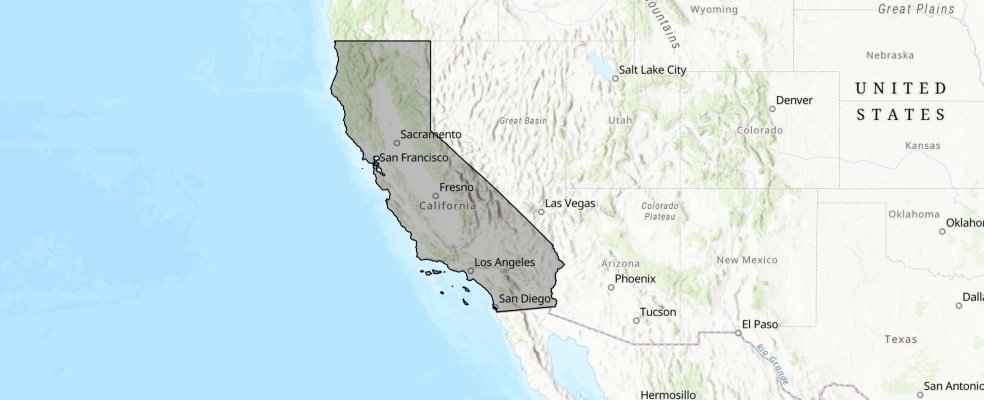

In [10]:
# Create a map
state_map = gis.map('California')
state_map

In [9]:
# Plot on a map
state_map.draw(us_state.geometry)

#### Geographic level: County

Let's look at different counties in California. Following a similar pattern as above, we will look at the first few counties. To look at all counties you may use `usa.subgeographies.states['California'].counties`.

In [11]:
ca_counties = [county for county in usa.subgeographies.states['California'].counties.items()][:5]
ca_counties

[('Alameda_County',
  <NamedArea name:"United States" area_id="06001", level="US.Counties", country="United States">),
 ('Alpine_County',
  <NamedArea name:"United States" area_id="06003", level="US.Counties", country="United States">),
 ('Amador_County',
  <NamedArea name:"United States" area_id="06005", level="US.Counties", country="United States">),
 ('Butte_County',
  <NamedArea name:"United States" area_id="06007", level="US.Counties", country="United States">),
 ('Calaveras_County',
  <NamedArea name:"United States" area_id="06009", level="US.Counties", country="United States">)]

Let's select a county in California. Notice how a county can be selected using its key i.e. `Alameda_County` or `San_Bernardino_County`. 

In [12]:
sb_county = usa.subgeographies.states['California'].counties['San_Bernardino_County']
sb_county

<NamedArea name:"United States" area_id="06071", level="US.Counties", country="United States">

__Visualize on a map__


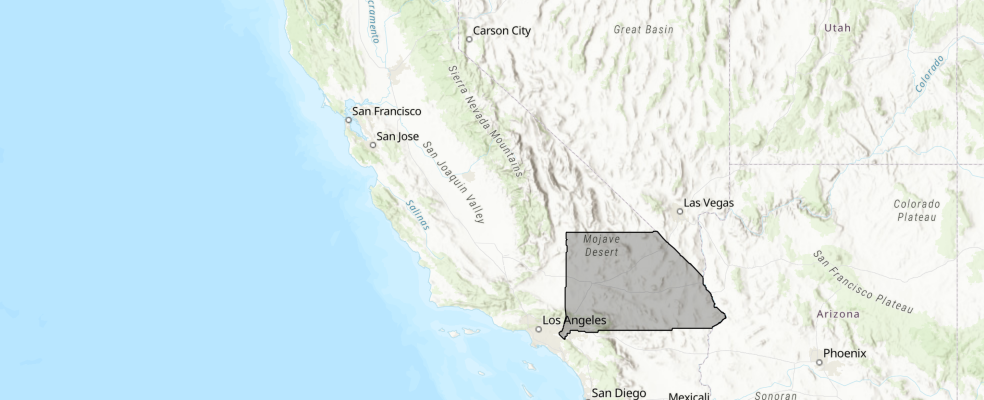

In [15]:
# Create a map
county_map = gis.map('California',6)
county_map

In [14]:
# Plot on a map
county_map.draw(sb_county.geometry)

#### Geographic level: Tract

Let's select a county and look at different tracts in the county. We will look at the first few tracts in `San Bernardino` county. To look at all tracts you may use `usa.subgeographies.states['California'].counties['San_Bernardino_County'].tracts`.

In [16]:
sb_tracts = [tract for tract in usa.subgeographies.states['California'].counties
             ['San_Bernardino_County'].tracts.items()][:5]
sb_tracts

[('060710002.01',
  <NamedArea name:"United States" area_id="06071000201", level="US.Tracts", country="United States">),
 ('060710002.03',
  <NamedArea name:"United States" area_id="06071000203", level="US.Tracts", country="United States">),
 ('060710002.05',
  <NamedArea name:"United States" area_id="06071000205", level="US.Tracts", country="United States">),
 ('060710002.07',
  <NamedArea name:"United States" area_id="06071000207", level="US.Tracts", country="United States">),
 ('060710002.08',
  <NamedArea name:"United States" area_id="06071000208", level="US.Tracts", country="United States">)]

Now, let's select a particular tract using its key.

In [17]:
usa.subgeographies.states['California'].counties['San_Bernardino_County'].tracts['060710002.03']

<NamedArea name:"United States" area_id="06071000203", level="US.Tracts", country="United States">

#### Geographic level: Cities and Towns

Cities and Towns in a state can be accessed using `Places` subgeography. We will look at the first few places in California. To view all places, you may use `usa.subgeographies.states['California'].places`.

In [18]:
ca_places = [place for place in usa.subgeographies.states['California'].places.items()][:5]
ca_places

[('Acalanes_Ridge_CDP',
  <NamedArea name:"United States" area_id="0600135", level="US.Places", country="United States">),
 ('Acampo_CDP',
  <NamedArea name:"United States" area_id="0600156", level="US.Places", country="United States">),
 ('Acton_CDP',
  <NamedArea name:"United States" area_id="0600212", level="US.Places", country="United States">),
 ('Adelanto_city',
  <NamedArea name:"United States" area_id="0600296", level="US.Places", country="United States">),
 ('Adin_CDP',
  <NamedArea name:"United States" area_id="0600310", level="US.Places", country="United States">)]

A particular city or town can be selected using its key. So we can use census `Acalanes_Ridge_CDP` key to get the details. 

`CDP` here stands for census designated places. Census designated places (CDPs) are statistical geographic entities representing closely settled, unincorporated communities that are locally recognized and identified by name. They are the statistical equivalents of incorporated places, with the primary differences being the lack of a legally defined boundary and an active, functioning governmental structure. 

In [19]:
usa.subgeographies.states['California'].places['Fontana_city']

<NamedArea name:"United States" area_id="0624680", level="US.Places", country="United States">

#### Geographic level: Zip Code

Zip codes can be accessed at both the state and county levels. `zip5` is used to select a zip code subgeography. Let's look at how zip codes can be selected.

Let's view a few zip codes for California and then select one. 

In [20]:
zip_ca = [zip_code for zip_code in usa.subgeographies.states['California'].zip5.items()][:5]
zip_ca

[('90001',
  <NamedArea name:"United States" area_id="90001", level="US.ZIP5", country="United States">),
 ('90002',
  <NamedArea name:"United States" area_id="90002", level="US.ZIP5", country="United States">),
 ('90003',
  <NamedArea name:"United States" area_id="90003", level="US.ZIP5", country="United States">),
 ('90004',
  <NamedArea name:"United States" area_id="90004", level="US.ZIP5", country="United States">),
 ('90005',
  <NamedArea name:"United States" area_id="90005", level="US.ZIP5", country="United States">)]

In [21]:
zip_92373 = usa.subgeographies.states['California'].zip5['92373']
zip_92373

<NamedArea name:"United States" area_id="92373", level="US.ZIP5", country="United States">

__Visualize on a map__


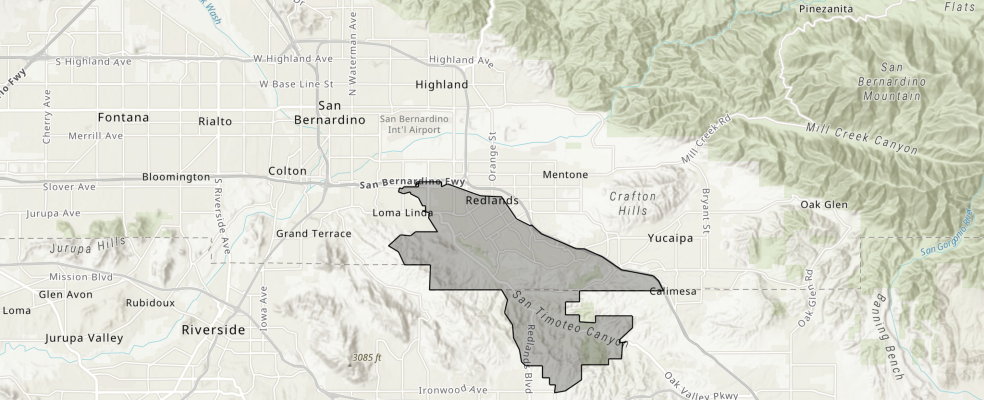

In [24]:
# Create a map
zip_map = gis.map('Redlands, CA')
zip_map

In [23]:
# Plot on a map
zip_map.draw(zip_92373.geometry)

Now let's view a few zip codes for San Bernardino county and then select one.

In [25]:
zip_sb = [zip_code for zip_code in usa.subgeographies.states['California'].
          counties['San_Bernardino_County'].zip5.items()][:5]
zip_sb

[('91701',
  <NamedArea name:"United States" area_id="91701", level="US.ZIP5", country="United States">),
 ('91708',
  <NamedArea name:"United States" area_id="91708", level="US.ZIP5", country="United States">),
 ('91709',
  <NamedArea name:"United States" area_id="91709", level="US.ZIP5", country="United States">),
 ('91710',
  <NamedArea name:"United States" area_id="91710", level="US.ZIP5", country="United States">),
 ('91730',
  <NamedArea name:"United States" area_id="91730", level="US.ZIP5", country="United States">)]

In [26]:
zip_92336 = usa.subgeographies.states['California'].counties['San_Bernardino_County'].zip5['92336']
zip_92336

<NamedArea name:"United States" area_id="92336", level="US.ZIP5", country="United States">

### Explore subgeographies for another country

The subgeography levels and their hierarchies are different for each country, and can also be different for the different datasets (which can be set using the `Country.dataset` property).

#### Geographic level: Country

In [27]:
india = Country.get('India')

Look at the different levels of subgeographies for India

In [28]:
india.levels

,level_name,singular_name,plural_name,alias,level_id,admin_level
0,subdistricts,Subdistrict,Subdistricts,Subdistricts,IN.Subdistricts,Admin4
1,districts,District,Districts,Districts,IN.Districts,Admin3
2,states,State,States,States,IN.States,Admin2
3,country,Country,Country,Country,IN.Country,Admin1


Here we see that subgeographies in India are different from those in U.S. India has `districts and sub-districts` instead of `counties and tracts`. Let's inspect a few states. Following a similar pattern of exploration as above, all states can be viewed using `india.subgeographies.states`.

#### Geographic level: State

In [29]:
in_states = [state for state in india.subgeographies.states.items()][:5]
in_states

[('Jammu_&_Kashmir',
  <NamedArea name:"India" area_id="01", level="IN.States", country="India">),
 ('Himachal_Pradesh',
  <NamedArea name:"India" area_id="02", level="IN.States", country="India">),
 ('Punjab',
  <NamedArea name:"India" area_id="03", level="IN.States", country="India">),
 ('Chandigarh',
  <NamedArea name:"India" area_id="04", level="IN.States", country="India">),
 ('Uttarakhand',
  <NamedArea name:"India" area_id="05", level="IN.States", country="India">)]

We see that various states are listed along with their properties such as name, area_id, level etc. Let's select a state and further explore its subgeographies.

In [30]:
state = india.subgeographies.states['Uttar_Pradesh']

In [31]:
state.geometry.type

'Polygon'

#### Geographic level: District

Let's look at different districts in the state of Uttar Pradesh. Following a similar pattern as above, we will look at the first few districts. To look at all districts you may use `usa.subgeographies.states['Uttar_Pradesh'].districts`.

In [32]:
in_districts = [district for district in india.subgeographies.states['Uttar_Pradesh'].districts.items()][:5]
in_districts

[('Saharanpur',
  <NamedArea name:"India" area_id="09132", level="IN.Districts", country="India">),
 ('Muzaffarnagar',
  <NamedArea name:"India" area_id="09133", level="IN.Districts", country="India">),
 ('Bijnor',
  <NamedArea name:"India" area_id="09134", level="IN.Districts", country="India">),
 ('Moradabad',
  <NamedArea name:"India" area_id="09135", level="IN.Districts", country="India">),
 ('Rampur',
  <NamedArea name:"India" area_id="09136", level="IN.Districts", country="India">)]

In [33]:
district = india.subgeographies.states['Uttar_Pradesh'].districts['Ghaziabad']

__Visualize on a map__


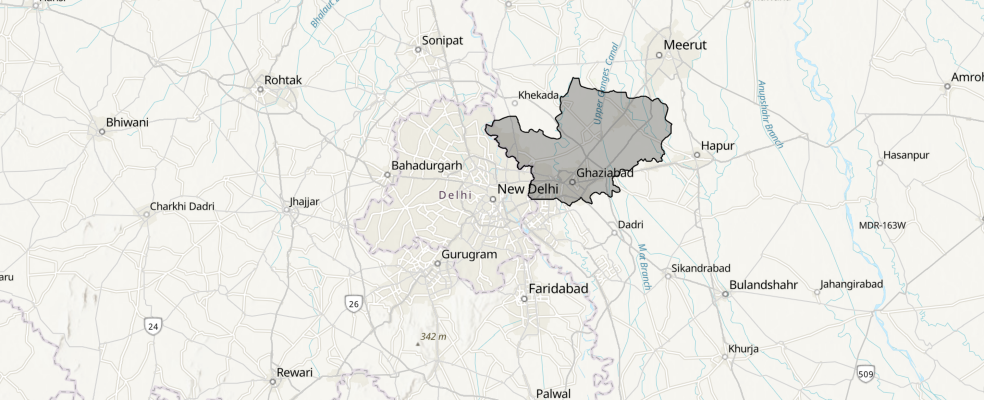

In [36]:
# Create a map
district_map = gis.map('New Delhi, India', 9)
district_map

In [35]:
# Plot on a map
district_map.draw(district.geometry)

#### Geographic level: Subdistrict

Let's select a district and look at different subdistricts in it. We will look at the first few subdistricts in `Baghpat` district. To look at all subdistricts you may use `india.subgeographies.states['Uttar_Pradesh'].districts['Ghaziabad'].subdistricts`.

In [37]:
in_subdistrict = [sub for sub in india.subgeographies.states['Uttar_Pradesh'].
                 districts['Ghaziabad'].subdistricts.items()][:5]
in_subdistrict

[('Modinagar',
  <NamedArea name:"India" area_id="0914000738", level="IN.Subdistricts", country="India">),
 ('Ghaziabad',
  <NamedArea name:"India" area_id="0914000739", level="IN.Subdistricts", country="India">),
 ('Loni',
  <NamedArea name:"India" area_id="0914006089", level="IN.Subdistricts", country="India">)]

Now, let's select a particular subdistrict.

In [38]:
india.subgeographies.states['Uttar_Pradesh'].districts['Ghaziabad'].subdistricts['Modinagar']

<NamedArea name:"India" area_id="0914000738", level="IN.Subdistricts", country="India">

### Searching for named areas within a country

Named statistical areas can also be searched within a country. Let's search for areas named `Riverside` in the U.S.

In [39]:
riversides_in_usa = usa.search('Riverside')
print("number of riversides in the US: " + str(len(riversides_in_usa)))

# list a few of them
riversides_in_usa[:10]

number of riversides in the US: 147


[<NamedArea name:"United States" area_id="147435", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147436", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147437", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147438", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147439", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147440", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147441", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147442", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147443", level="Cities", country="United States">,
 <NamedArea name:"United States" area_id="147444", level="Cities", country="United States">]

__The named areas can also be drawn on a map, as they include a `geometry` property__

For instance, you can make a map of all the riversides in the US


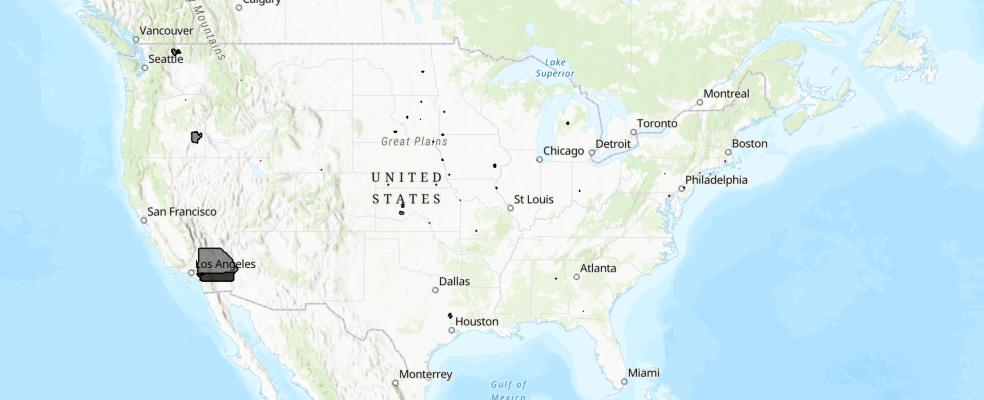

In [42]:
usamap = gis.map('United States', zoomlevel=4)
usamap

In [41]:
for riverside in riversides_in_usa:
    usamap.draw(riverside.geometry)

## Conclusion

In this part of the `arcgis.geoenrichment` module guide series, you explored several named statistical areas in a hierarchy of geography levels. You saw, in detail, how different geography levels can be queried so it can then be used for enrichment. You were introduced to `Country` class and `Country.get()` method which can be used to discover sub-geographies, data collections and available reports for a country.

In the subsequent pages, you will learn about Data Collections and GeoEnrichment coverage, Generating Reports and Standard Geography Queries.